In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
import importlib
from matplotlib import animation as am
from scipy.optimize import root_scalar, minimize
from lin_stability import * 

In [3]:
kappa = 1
n = 6 
mu = 1.2
nu = 1.2
tau = 5
epsilon = 1

m = model(mu, nu, kappa, n, tau, epsilon)

# First, try to see if there is a uniform solution

If there are three crossings with the x-axis, there are two stable uniform solutions; if there is only one crossing, there is one stable uniform solution 

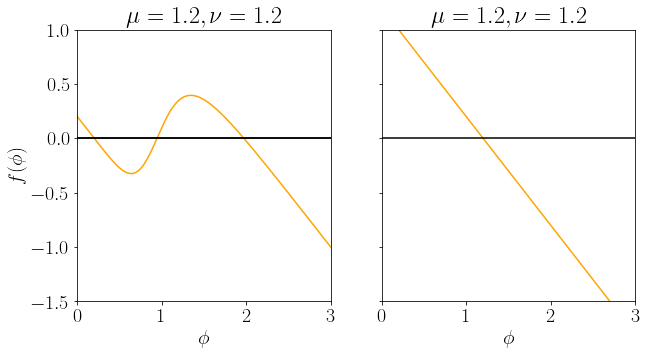

In [7]:
psis = np.arange(0, 5, 0.01)
plt.rc('font', size=20)
plt.rc('text', usetex=True)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10, 5))

m.set_mu_nu(2, 0.2)
axes[0].plot(psis, m.f(psis), color='orange')
axes[0].axhline(y=0, color='k')
axes[0].axhline(y=0, color='k')
axes[0].set_xlim([0, 3])
axes[0].set_ylim([-1.5, 1])
axes[0].set_ylabel(r'$f(\phi)$')
axes[0].set_xlabel(r'$\phi$')
axes[0].set_title(r'$\mu={}, \nu={}$'.format(mu, nu))

m.set_mu_nu(1.2, 1.2)
axes[1].plot(psis, m.f(psis), color='orange')
axes[1].axhline(y=0, color='k')
axes[1].set_xlim([0, 3])
axes[1].set_ylim([-1.5, 1])
axes[1].set_title(r'$\mu={}, \nu={}$'.format(mu, nu))
axes[1].set_xlabel(r'$\phi$')


plt.show() 

# Focus on the case where there is only one stable uniform solution 

In [8]:
m.tau = 0.5 
m.epsilon = 0.1
print('uniform solution:', m.find_phi_bar(8))

uniform solution: 1.2


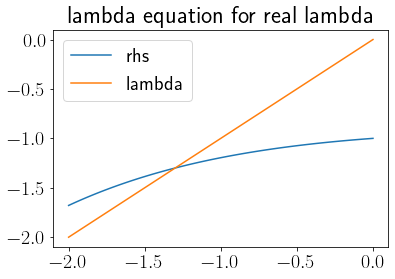

In [9]:
lbdas = np.linspace(-2, 0, 100)
plt.plot(lbdas, m.rhs(lbdas), label='rhs')
plt.plot(lbdas, lbdas, label='lambda')
plt.title('lambda equation for real lambda')
plt.legend() 
plt.show() 

## Look at the behaviour of $\lambda$ when $\sigma = 0$ and when $\omega = 0$ 

In [10]:
try: 
    e_star = m.get_e_star()
    print('e_star = ', e_star)
except Exception:
    print('no threshold value for epsilon')
    
try: 
    tau_star = m.get_tau_star()
    print('tau_star = ', tau_star)
except Exception: 
    print('no threshold value for tau')

e_star =  1.3007719372340625
no threshold value for tau


/Users/yutingli/Documents/kuramoto/lin_stability.py:47: RuntimeWarning: invalid value encountered in sqrt
  omega_star = np.sqrt((self.nu_bar-self.mu_bar)**2 - self.kappa**2)


## Look for purely imaginary solutions 

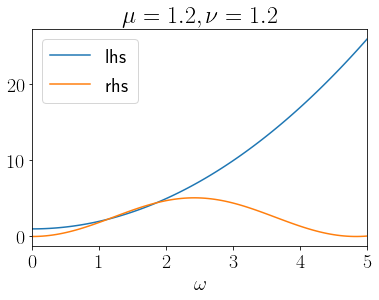

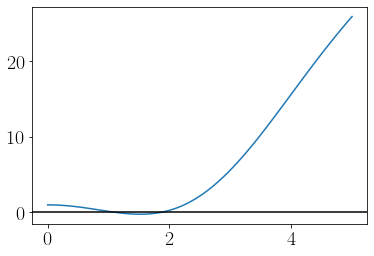

In [7]:
m.epsilon = 1.3
omegas = np.linspace(0, 5, 100)
plt.plot(omegas, m._y1(omegas), label=r'lhs')
plt.plot(omegas, m._y2(omegas), label=r'rhs')
plt.legend() 
plt.xlim([0, 5])
plt.xlabel(r'$\omega$')
plt.title(r'$\mu={}, \nu={}$'.format(mu, nu))
plt.show() 

plt.plot(omegas, m._y1(omegas)-m._y2(omegas))
plt.axhline(y=0, color='k')
plt.show()

In [7]:
roots = m.solve_for_omega(1.3)
print(roots)

[1.1224830904037406, 1.8529926996798523]


In [8]:
omega = roots[0]
taus = m.solve_for_tau(omega)
print(taus)
print([m.obtain_grads(omega, tau) for tau in taus])

(5.595920325472981, 11.193497127204235, 16.791073928935493)
[(-0.005769522739112161, 0.09084282559646768), (-0.0017113032753847885, 0.050211525363630945), (-0.0008078287612675944, 0.03468567301089473)]


## Numerically compute threshold values for each $\epsilon$

In [11]:

epsilons = np.arange(0.1, 10, 0.01)
res = [] 
for epsilon in epsilons:
    roots = m.solve_for_omega(epsilon)
    if roots is not None: 
        for omega in roots: 
            taus = m.solve_for_tau(omega)
            grads = [m.obtain_grads(omega, t) for t in taus]
            res.append([[epsilon]*3, taus, grads])
        

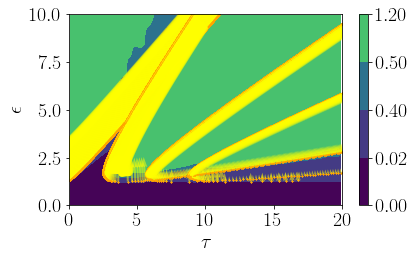

In [12]:
stds = np.load('std.npy')
            
A = np.arange(0, 10, 0.1)
B = np.arange(0.1, 20, 0.1)

shape = (len(A), len(B))

plt.rcParams['text.usetex'] = True
plt.rc('font', size=20)

image = stds[:, -1].reshape(shape)
X = stds[:, 0].reshape(shape)
Y = stds[:, 1].reshape(shape)
plt.contourf(Y, X, image, levels=[0, 0.02, 0.4, 0.5, 1.2]) 
plt.colorbar() 
# plt.axhline(y=1.3, color='white', alpha=0.5)
# plt.axhline(y=1.6, color='white', alpha=0.5)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\epsilon$')

for (es, ts, grads) in res:
    plt.scatter(ts, es, color='orange', s=1.5, marker='x')  
    plt.quiver(ts, es, [g[0] for g in grads], [g[1] for g in grads], alpha=0.5, color='yellow')
        
plt.xlim([0, 20])
plt.ylim([0, 10])
plt.tight_layout()
plt.savefig('2d_map.pdf')
plt.show() 